# 1. Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd

# Load the data
train = pd.read_csv('../data/train.csv', encoding='utf-8')  

print(train.shape)
train.head()


(7613, 5)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
# Basic inspection of the data
train.info()
train.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          7613 non-null   int64 
 1   keyword     7552 non-null   object
 2   location    5080 non-null   object
 3   text        7613 non-null   object
 4   target      7613 non-null   int64 
 5   n_chars     7613 non-null   int64 
 6   n_words     7613 non-null   int64 
 7   n_hashtags  7613 non-null   int64 
 8   n_emojis    7613 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 535.4+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,7613.0,NaN,NaN,NaN,5441.934848,3137.11609,1.0,2734.0,5408.0,8146.0,10873.0
keyword,7552,221,fatalities,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,5080,3341,USA,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
text,7613,7503,11-Year-Old Boy Charged With Manslaughter of T...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
target,7613.0,NaN,NaN,NaN,0.42966,0.49506,0.0,0.0,0.0,1.0,1.0
n_chars,7613.0,NaN,NaN,NaN,101.037436,33.781325,7.0,78.0,107.0,133.0,157.0
n_words,7613.0,NaN,NaN,NaN,14.903586,5.732604,1.0,11.0,15.0,19.0,31.0
n_hashtags,7613.0,NaN,NaN,NaN,0.43741,1.085629,0.0,0.0,0.0,0.0,13.0
n_emojis,7613.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- Data contains 7,613 rows and five columns; id, keyword, location, text, target.
- However, the keyword column has 61 missing values, and the location column has 2,533 missing values.
- On average, 43% of tweets are labelled as disasters. 

          count        mean        std  min   25%    50%    75%    max
n_chars  7613.0  101.037436  33.781325  7.0  78.0  107.0  133.0  157.0
n_words  7613.0   14.903586   5.732604  1.0  11.0   15.0   19.0   31.0


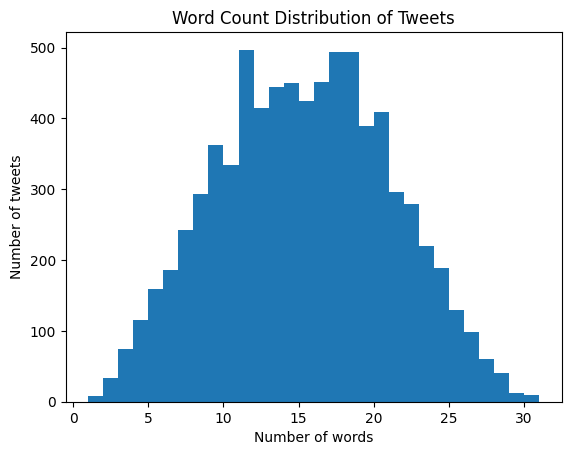

In [8]:
# Checking the length of tweets
train['n_chars'] = train['text'].str.len()
train['n_words'] = train['text'].str.split().str.len()

length_stats = train[['n_chars', 'n_words']].describe().T
print(length_stats)

# Word-count histogram
import matplotlib.pyplot as plt

plt.hist(train['n_words'], bins=30)
plt.title("Word Count Distribution of Tweets")
plt.xlabel('Number of words')
plt.ylabel('Number of tweets')
plt.show()

- Above histogram shows roughly bell-shaped distribution, indicating that tweet lengths are normally distributed around a central value.
- On average, tweets in the dataset contain approximately 15 words and 100 characters.


In [9]:
# Stratified Train/Validation Split
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(
  train,
  test_size= 0.20,
  stratify = train['target'],
  random_state=42
)

print("Train disaster %:", train_df['target'].mean())
print("Val disaster %:", val_df['target'].mean())

Train disaster %: 0.4297208538587849
Val disaster %: 0.4294156270518713


- About 42.97% of tweets in the training set are labeled as disasters, whilst about 42.94% of tweets in the validation set are labeled as disasters.
- These two percentages are almost identical, which confirms that the stratified split preserved the class balance of the origianl dataset.
- This is important because it ensures the class balance (disaster vs. non-disaster tweets) is preserved in both training and validation sets. This makes the evaluation more reliable and avoids bias due to uneven class distributions.

In [14]:
# Checking hashtags and mentions usage
import re

# Count hashtags
train['n_hashtags'] = train['text'].str.count(r'#\w+')

# Count mentions
train['n_mentions'] = train['text'].str.count(r'@\w+')

# Compare averages across target (0 = non-disaster, 1 = disaster)
hashtag_mention_stats = train.groupby('target')[['n_hashtags', 'n_mentions']].mean()
print(hashtag_mention_stats)



        n_hashtags  n_mentions
target                        
0         0.388761    0.420313
1         0.501987    0.272088


- **Disaster tweets include more hashtags**, likely to tag events or raise awareness.
- **Non-disaster tweets contain more user mentions**, suggesting more conversational or social interactions.
- These patterns suggest that hashtags and mentions can be meaningful features in distinguishing tweet types.